# F20DL Coursework

In [1]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import cv2 as cv
import random

from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

In [2]:
#location of datasets
path = 'datasets/COVID19_Xray/'
train = os.listdir(path)

In [3]:
#possible labels
labels=["covid", "normal", "pneumonia"]
print (f'The labels are {labels}')

#image size
image_size = 256
print(f'All images to be resized into {image_size}*{image_size} pixels')

The labels are ['covid', 'normal', 'pneumonia']
All images to be resized into 256*256 pixels


In [4]:
images = []

#Read all images via label
for label in labels:
    direc = os.path.join(path, label)
    class_num = labels.index(label)
    
    #for each image in folder
    for image in os.listdir(direc):
        #Read and greyscale and image
        image_read = cv.imread(os.path.join(direc,image),cv.IMREAD_GRAYSCALE)
        #Resize image
        image_resized = cv.resize(image_read,(image_size,image_size))
        #Add image to list
        images.append([image_resized,class_num])

#Creates Numpy array of images
training_images = np.array(images,dtype=object)
print(f'Shape of the training images = {training_images.shape}')

Shape of the training images = (4575, 2)


In [5]:
X = []
y = []

test_data = []
test_label = []

for feature, label in training_images:
    #Randomly select images to be either train or test with 70/30 split
    if random.randint(1, 100) <= 70:
        X.append(feature)
        y.append(label)
    else:
        test_data.append(feature)
        test_label.append(label)
        
        

print (f'Length of X = {len(X)}')
print (f'Length of y = {len(y)}')
print (f'Length of test = {len(test_data)}')

Length of X = 3218
Length of y = 3218
Length of test = 1357


Number of Normal images = 1070
Number of Bacteria images = 1075
Number of Virus images = 1073


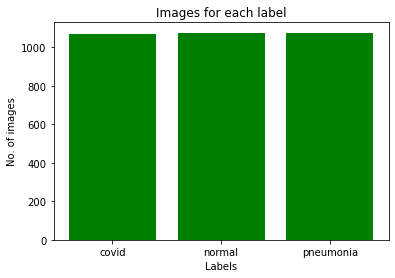

In [6]:
a = 0
b = 0
c = 0

for label in y:
    if label == 0:
        a += 1
    if label == 1:
        b += 1
    if label == 2:
        c += 1
        
print (f'Number of Normal images = {a}')
print (f'Number of Bacteria images = {b}')
print (f'Number of Virus images = {c}')

# plotting the data to ensure even ditribution of data
x_pos = [i for i, _ in enumerate(labels)]
numbers = [a,b,c]
plt.bar(x_pos,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(x_pos, labels)

plt.show()

In [7]:
#Creates Numpy array of X
Xnp = np.array(X)

#Splits Xnp dimentions into seperate variables
nsamples, nx, ny = Xnp.shape

#Flattens into 2D array of [Samples, X]
flat_train_dataset = Xnp.reshape((nsamples, nx*ny))

In [8]:
#Creates a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(flat_train_dataset,y)

GaussianNB()

In [9]:
#Creates Numpy array of test data
test_dataNP = np.array(test_data)

#nTest_sample, testx, testy = test_dataNP.shape

#flat_test_dataset = test_dataNP.reshape((nTest_sample, testx*testy))


i = 0
correct = 0
TP = [0,0,0]
FP = [0,0,0]
FN = [0,0,0]
TN = [0,0,0]

TPR = np.array([[0] * test_dataNP.size, [0] * test_dataNP.size, [0] * test_dataNP.size],dtype=object)
FPR = np.array([[0] * test_dataNP.size, [0] * test_dataNP.size, [0] * test_dataNP.size],dtype=object)

for x in test_dataNP:
    #Splits x dimentions into variables
    testx, testy = x.shape
    
    #flattens test data into [1, x]
    flat_test_data = x.reshape((1, testx*testy))
    
    #classify image
    predicted= model.predict(flat_test_data)
    
    #calculates accuracy 
    if test_label[i] == predicted:
        correct += 1
    
    
    if test_label[i] == 0:
        if test_label[i] == predicted:
            TP[0] += 1
            TN[1] += 1
            TN[2] += 1
        elif predicted == 1:
            FP[1]+= 1
            FN[0] += 1
        else:
            FP[2] += 1
            FN[0] += 1
            
    elif test_label[i] == 1:
        if test_label[i] == predicted:
            TP[1] += 1
            TN[0] += 1
            TN[2] += 1
        elif predicted == 0:
            FP[0] += 1
            FN[1] += 1
        else:
            FP[2] += 1
            FN[1] += 1
            
    else:
        if test_label[i] == predicted:
            TP[2] += 1
            TN[1] += 1
            TN[0] += 1
        elif predicted == 1:
            FP[1] += 1
            FN[2] += 1
        else:
            FP[0] += 1
            FN[2] += 1
            
    if (i % 100 == 0):
        for y in range(3):
            if (FP[y] != 0 and TP[y] != 0):
                FPR[y][x] = (FP[y]/(FP[y]+TN[y]))
                TPR[y][x] = (TP[y]/(TP[y]+FN[y]))
        
    i = i + 1
    
#Calculate percentage of correct guesses    
print("Correct: " + str(((correct/i)*100)) + "%")   


Correct: 74.94473102431834%


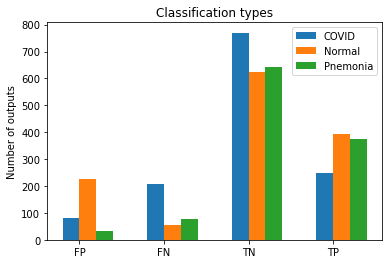

In [10]:

N = 4
CovData = (FP[0],FN[0],TN[0],TP[0])
NorData = (FP[1],FN[1],TN[1],TP[1])
PneData = (FP[2],FN[2],TN[2],TP[2])

ind = np.arange(N) 
width = 0.2       
plt.bar(ind, CovData, width, label='COVID')
plt.bar(ind + width, NorData, width,label='Normal')
plt.bar(ind + (width*2), PneData, width,label='Pnemonia')

plt.ylabel('Number of outputs')
plt.title('Classification types')

plt.xticks(ind + width / 2, ('FP', 'FN', 'TN', 'TP'))
plt.legend(loc='best')
plt.show()

This graph shows that the COVID class has the highest true negitive rate and the lowest true positive rate this would suggest that it was most commonly misinterpreted as another class. Due to the similarites between COVID patients and Pnemonia patents I would guess that this is where the model was most likely to fail.

Another outlier is in the normal class false positive. I would guess that this is due to the large variation within the class

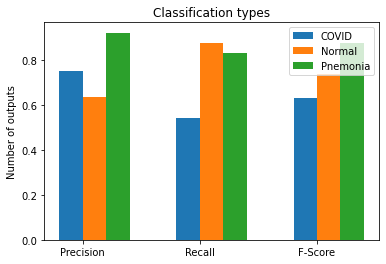

In [11]:
precision = [0,0,0]
recall = [0,0,0]
fScore = [0,0,0]

for i in range(3):
    precision[i] = (TP[i]/(TP[i]+FP[i]))

    recall[i] = (TP[i]/(TP[i]+FN[i]))

    fScore[i] = (TP[i]/(TP[i] + 0.5*(FP[i] + FN[i])))


ind = np.arange(3) 
width = 0.2       
plt.bar(ind, (precision[0], recall[0], fScore[0]), width, label='COVID')
plt.bar(ind + width, (precision[1], recall[1], fScore[1]), width,label='Normal')
plt.bar(ind + (width*2), (precision[2], recall[2], fScore[2]), width,label='Pnemonia')

plt.ylabel('Number of outputs')
plt.title('Classification types')

plt.xticks(ind + width / 2, ('Precision', 'Recall', 'F-Score'))
plt.legend(loc='best')
plt.show()

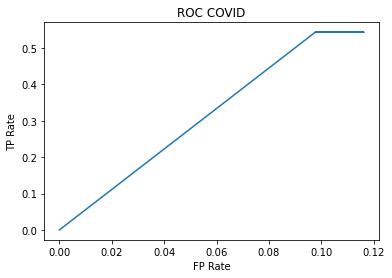

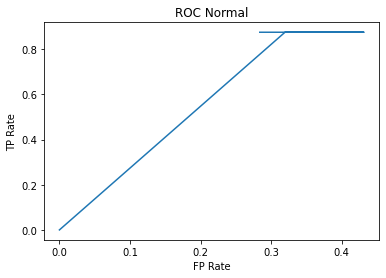

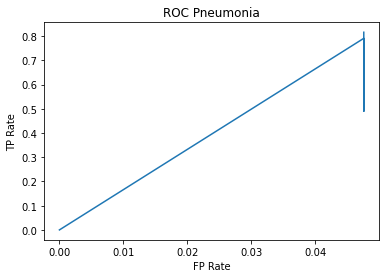

In [12]:
plt.plot(FPR[0], TPR[0])
plt.title('ROC COVID')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.show()

plt.plot(FPR[1], TPR[1])
plt.title('ROC Normal')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.show()

plt.plot(FPR[2], TPR[2])
plt.title('ROC Pneumonia')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.show()

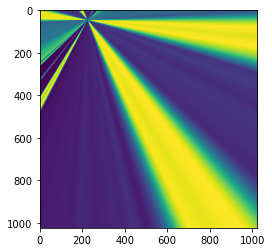

In [13]:
maxFeatures=500 
keepPercent=0.2
debug=False

# convert both the input image and template to grayscale
templateGray = cv.imread("datasets/COVID19_Xray/covid/COVID-19 (1).jpeg",cv.IMREAD_GRAYSCALE)
imageGray = cv.imread("datasets/COVID19_Xray/covid/COVID-19 (9).jpg",cv.IMREAD_GRAYSCALE)

# use ORB to detect keypoints and extract (binary) local
# invariant features
orb = cv.ORB_create(maxFeatures)
(kpsA, descsA) = orb.detectAndCompute(imageGray, None)
(kpsB, descsB) = orb.detectAndCompute(templateGray, None)
# match the features
method = cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
matcher = cv.DescriptorMatcher_create(method)
matches = matcher.match(descsA, descsB, None)

# sort the matches by their distance (the smaller the distance,
# the "more similar" the features are)
matches = sorted(matches, key=lambda x:x.distance)
# keep only the top matches
keep = int(len(matches) * keepPercent)
matches = matches[:keep]
# check to see if we should visualize the matched keypoints
if debug:
    matchedVis = cv.drawMatches(image, kpsA, template, kpsB,
        matches, None)
    matchedVis = imutils.resize(matchedVis, width=1000)
    cv.imshow("Matched Keypoints", matchedVis)
    cv.waitKey(0)

# allocate memory for the keypoints (x, y)-coordinates from the
# top matches -- we'll use these coordinates to compute our
# homography matrix
ptsA = np.zeros((len(matches), 2), dtype="float")
ptsB = np.zeros((len(matches), 2), dtype="float")
# loop over the top matches
for (i, m) in enumerate(matches):
    # indicate that the two keypoints in the respective images
    # map to each other
    ptsA[i] = kpsA[m.queryIdx].pt
    ptsB[i] = kpsB[m.trainIdx].pt
# compute the homography matrix between the two sets of matched
# points
(H, mask) = cv.findHomography(ptsA, ptsB, method=cv.RANSAC)
# use the homography matrix to align the images
(h, w) = templateGray.shape[:2]
aligned = cv.warpPerspective(imageGray, H, (w, h))
# return the aligned image

plt.imshow(aligned)
#plt.imshow(imageGray)
#plt.imshow(templateGray)